# CCE2502 Assignment II - Logistic Regression
### Year 2024-2025- Semester II



A number of functions are given, including the partially completed gradient descent optimizer.

Please follow instructions in the assignment specifications document.


In [31]:
# import useful packages
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [32]:
# Do not carry out any changes to the code in this cell

def lr_loss_function(y_target,y_predicted):
    """
    y_target: actual gold labels (vector of size(m,))
    y_predicted : predicted probabilities for positive class (vector of size (m,))
    returns categorical cross entropy loss
    """
    m=y_target.shape[0]
    L = -(y_target*np.log(y_predicted) + (1-y_target)*np.log(1-y_predicted)).sum()/m
    return L


def predict_y_prob(W,D):
    """
    W is the weight vector [[w_0],[w_1],[w_2],...] of size [N+1,1]
    where N is number of features, excluding bias
    D is the feature matrix [m,N] where m is the number of examples
    return a vector of size (m,1)
    """
    m = D.shape[0]
    bias = np.ones([m,1], dtype=float)
    X = np.concatenate((bias,D),axis=1)
    z = np.matmul(W.T,X.T)
    y = 1/(1+np.exp(-z))
    #
    return y.T

def get_accuracy(W,X,y):
    """
    W is the weight vector [[w_0],[w_1],[w_2],...] of size [N+1,1]
    where N is number of features, excluding bias
    X is the feature matrix [m,N] where m is the number of examples
    y is the gold label vector of size (m,)
    Computes and returns the accuracy in predicting the positive class and returns a scalar
    """
    Y_pred = (predict_y_prob(W,X)>=0.5).astype(int)
    #
    return (Y_pred.ravel()==y).astype(int).sum()/y.shape[0]

def display_results(model):
    #
    history_train_loss = model['history']['train_loss']
    history_val_loss = model['history']['val_loss']
    t=range(len(history_train_loss))
    p1, p2 = plt.plot(t,history_train_loss,'b',t,history_val_loss,'r')
    plt.legend([p1,p2], ['Train loss','Val loss'])
    #
    print('train acc : ', model['train_acc'])
    print('val acc   : ', model['val_acc'])
    #
    print('Weights : ', model['weights'].ravel())
    return 0

# Use this function for plotting datasets as scatter graphs
def data_scatter_plot(X,y):
    """
    Plots a scatter graph for a 2-D dataset
    X : Feature numpy array of size (m,N), 
            m=number of examples (rows)
            N = number of features (columns)
            If N>2, first two features taken in consideration
    y : Output label numpy array of size (m,1) or (m,)
    """
    mk ={0:'or', 1:'ob'}
    plt.plot(X[:,0][y[:]==0] , X[:,1][y[:]==0], mk[0])
    plt.plot(X[:,0][y[:]==1] , X[:,1][y[:]==1], mk[1])

In [33]:
# Gradient Descent algorithm that learns the model parameters
# The update equations require the partial derivatives of the loss function
# with respect to the weights or parameter of the model
#
def lr_train_model(X_data, 
                   y_data, 
                   reshuffle = 'yes',
                   split_frac=0.8, 
                   init_weights=0.00001, 
                   no_iterations=2000,
                   alpha = 0.001,
                   phi = 0.001):
    """
    X_data : data feature matrix (including bias x_0 = 1.0)
    y_data : data output values
    split_frac : data split fraction, we require the split to compute validation mse
        if split_frac = -1 (or negative), then dataset is not split and train and val portions are the same
    init_weights : initial weights (all same value)
        if init_weights = -1 (or negative), then random weights are chosen
    alpha : learning rate
    phi : regularisation constant
    W : weights vector
    """
    #
    idx = np.arange(0, y_data.shape[0])
    if reshuffle == 'yes':
        np.random.shuffle(idx)
    X_data = np.copy(X_data[idx])
    y_data = np.copy(y_data[idx])
    #
    if split_frac < 0.0:
        y_train, y_val, X_train, X_val = y_data, y_data, X_data, X_data
    else:
        split = int(y_data.shape[0]*split_frac)
        y_train, y_val, X_train, X_val  = y_data[0:split], y_data[split:], X_data[0:split], X_data[split:]
    #
    N = X_data.shape[1] # number of features
    print("Number of input features :",N)
    if init_weights < 0.0:
        W = 0.5*(np.random.rand((N+1))-0.5).reshape(N+1,1)
    else:
        W = np.full((N+1,1), init_weights) # initialise weight vectors to the same value
    print("Initial Weights:",W)
    m=y_train.shape[0]
    history_loss=[]
    history_val_loss=[]
    #
    for itr in range(no_iterations):
        y_pred_pr = predict_y_prob(W,X_train).ravel()
        loss = lr_loss_function(y_train,y_pred_pr)
        history_loss.append(loss)
        history_val_loss.append(lr_loss_function(y_val,predict_y_prob(W,X_val).ravel()))
        #
        #
        #######################################################################
        m = X_train.shape[0]
        X_full = np.concatenate((np.ones((m,1)), X_train), axis=1)
        error  = y_pred_pr - y_train.ravel()
        grad   = (X_full.T @ error) / m
        grad[1:] += (phi / m) * W[1:,0]
        W     -= alpha * grad.reshape(W.shape)

        ####################################################################
    #
    #
    return {'weights':W, 
            'history':{'train_loss':history_loss,
                                    'val_loss':history_val_loss},
            'train_acc':get_accuracy(W,X_train,y_train),
            'val_acc':get_accuracy(W,X_val,y_val)}

## TASK 1

X shape: (1000, 2)
y shape: (1000,)


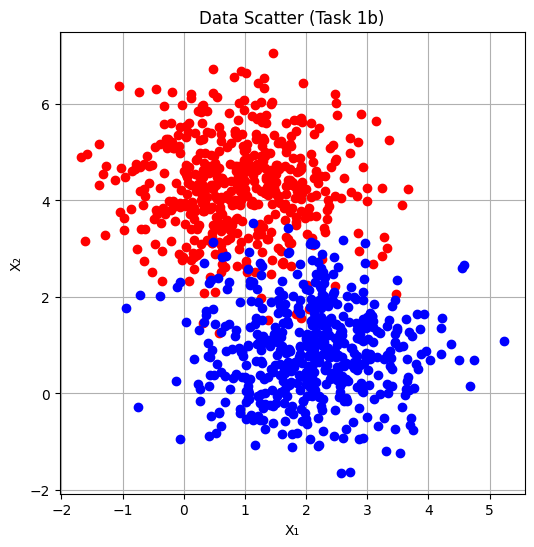

In [34]:
import csv
import numpy as np

#load data
X, y = [], []
with open('binary_classification_basic.csv', 'r') as file:
    reader = csv.reader(file)
    next(reader)#skip header
    for row in reader:
        X.append([float(row[0]), float(row[1])])
        y.append(int(float(row[2])))

#Convert lists into NumPy Arrays
X = np.array(X)
y = np.array(y)

print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")

# Plot the data
plt.figure(figsize=(6,6))
data_scatter_plot(X, y)
plt.xlabel('X₁'); plt.ylabel('X₂')
plt.title('Data Scatter (Task 1b)')
plt.grid(True)
plt.show()


The regularized categorical cross‐entropy loss is
$$
L(w)
= -\frac{1}{2m}\sum_{i=1}^m
   \Bigl[
     t^{(i)}\log\bigl(y(x^{(i)},w)\bigr)
     +(1 - t^{(i)})\log\bigl(1 - y(x^{(i)},w)\bigr)
   \Bigr]
   \;+\;\phi\sum_{j=1}^N w_j^2.
$$

We will simplify this function using the following substitution.

$$
y^{(i)} \;=\; y\bigl(x^{(i)},w\bigr)
$$

The derivative w.r.t w is calculated as shown below:

$$
\frac{\partial L}{\partial w}
=
\frac{\partial}{\partial w}
\Biggl[
  -\frac{1}{2m}
  \sum_{i=1}^m\bigl(t^{(i)}\log y^{(i)} + (1-t^{(i)})\log(1-y^{(i)})\bigr)
\Biggr]
\;+\;
\frac{\partial}{\partial w}
\Biggl[
  \phi\sum_{j=1}^N w_j^2
\Biggr]
$$

Consider the second part of the calculation. This is a simple derivative:

$$
\frac{\partial}{\partial w_j}\Bigl[\phi\sum_{j=1}^N w_j^2\Bigr]
= 2\,\phi\,w_j
$$

The first part of the calculation can be solved using the chain rule and is applied as follows:

$$
\frac{\partial}{\partial w}\bigl[t^i\log y^i + (1-t^i)\log(1-y^i)\bigr]
= \Bigl(\frac{t^i}{y^i} - \frac{1-t^i}{1-y^i}\Bigr)
  \frac{\partial y^i}{\partial w}
$$

Combining all of the above we get the following derivation:

$$
\frac{\partial L}{\partial w}
= -\frac{1}{2m}\sum_{i=1}^m
  \Bigl(\frac{t^i}{y^i} - \frac{1-t^i}{1-y^i}\Bigr)
  \frac{\partial y^i}{\partial w}
  + 2\,\phi\,w
$$

Now lets consider the remaining derivative:

$$
y^{(i)}(w)
= \frac{1}{1 + e^{-\,w\cdot x^{(i)}}},
$$

$$
\frac{\partial y^{(i)}(w)}{\partial w}
= \frac{\partial}{\partial w}\,(1 + e^{-\,w\cdot x^{(i)}})^{-1}
$$

$$
= -\,(1 + e^{-\,w\cdot x^{(i)}})^{-2}
  \;\frac{\partial}{\partial w}\,\bigl(1 + e^{-\,w\cdot x^{(i)}}\bigr)
$$

$$
\frac{\partial}{\partial w}\,\bigl(1 + e^{-\,w\cdot x^{(i)}}\bigr)
= -\,e^{-\,w\cdot x^{(i)}}\,x^{(i)}
$$

$$
\frac{\partial y^{(i)}(w)}{\partial w}
= -\,\frac{1}{\bigl(1 + e^{-\,w\cdot x^{(i)}}\bigr)^2}
  \;(-\,e^{-\,w\cdot x^{(i)}})\,x^{(i)}
= \frac{e^{-\,w\cdot x^{(i)}}}{\bigl(1 + e^{-\,w\cdot x^{(i)}}\bigr)^2}\;x^{(i)}
$$

Therefore our final derivation is the following: 
$$
\frac{\partial L}{\partial w_j}
= -\frac{1}{2m}\sum_{i=1}^m
   \Bigl(\frac{t^{(i)}}{y^{(i)}} \;-\; \frac{1 - t^{(i)}}{1 - y^{(i)}}\Bigr)
   \;\frac{e^{-\,w\cdot x^{(i)}}}{\bigl(1 + e^{-\,w\cdot x^{(i)}}\bigr)^2}\;x_j^{(i)}
\;+\;2\,\phi\,w_j.
$$


Number of input features : 2
Initial Weights: [[1.e-05]
 [1.e-05]
 [1.e-05]]
train acc :  0.90875
val acc   :  0.93
Weights :  [ 0.16174558  0.53479102 -0.55880275]


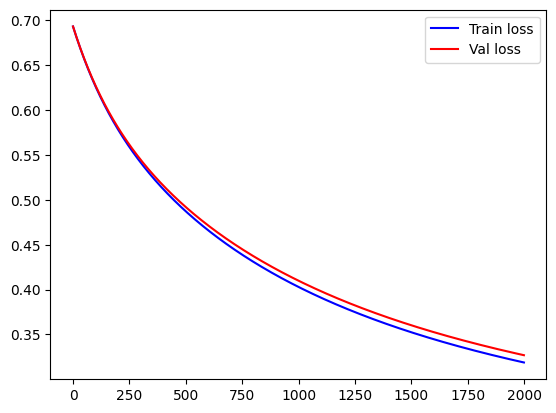

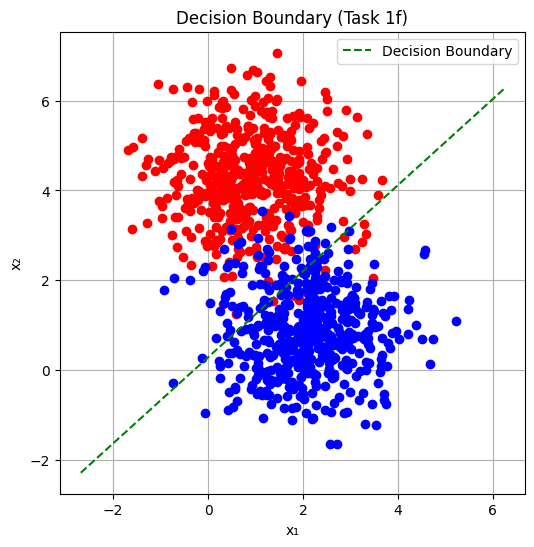

In [35]:
#train the model on the basic dataset
result = lr_train_model(X, y)

display_results(result)

#Plotting the original data points.
plt.figure(figsize=(6,6))
data_scatter_plot(X, y)

# unpack bias & weights
b, w1, w2 = result['weights'].ravel()

# make x1 grid
x1_vals = np.linspace(X[:,0].min()-1, X[:,0].max()+1, 100)

# solve for x2
x2_vals = -(b + w1 * x1_vals) / w2

# plot decision boundary
plt.plot(x1_vals, x2_vals, 'g--', label='Decision Boundary')

plt.legend()
plt.title("Decision Boundary (Task 1f)")
plt.xlabel("x₁")
plt.ylabel("x₂")
plt.grid(True)
plt.show()

## TASK 2


Number of input features : 2
Initial Weights: [[1.e-05]
 [1.e-05]
 [1.e-05]]
train acc :  0.50375
val acc   :  0.485
Weights :  [ 0.00060127 -0.00068674  0.00657736]


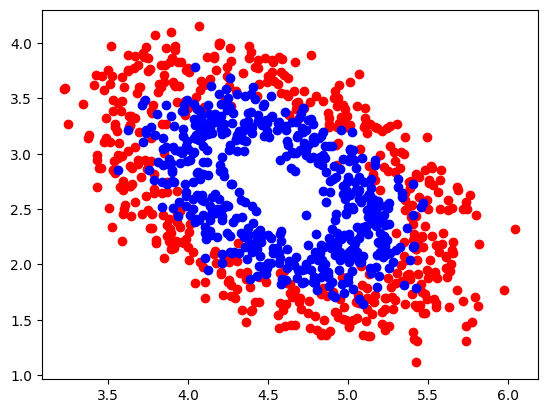

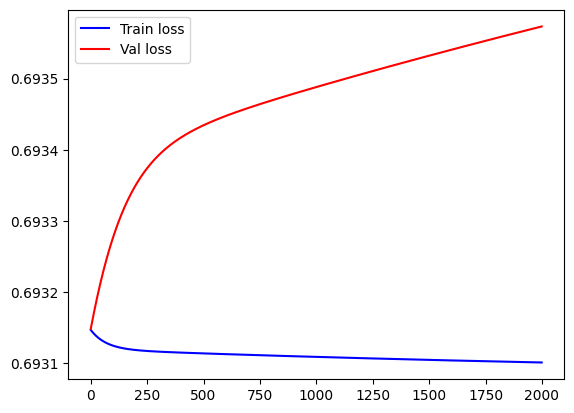

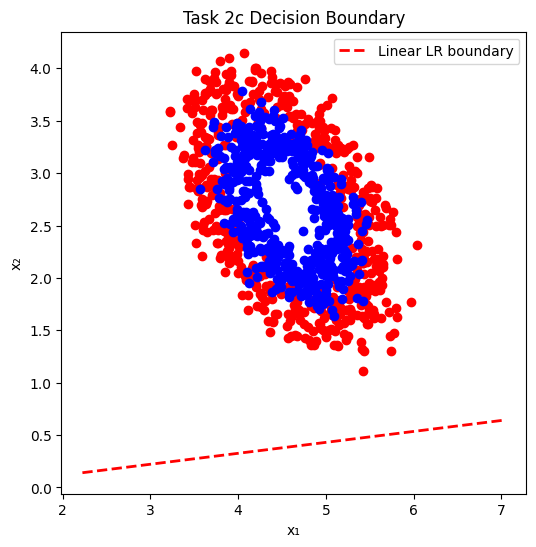

In [36]:
# Load the advanced dataset
X_adv, y_adv = [], []
with open('binary_classification_advanced.csv', 'r', newline='') as f:
    reader = csv.reader(f)
    next(reader, None)  # skip header
    for row in reader:
        X_adv.append([float(row[0]), float(row[1])])
        y_adv.append(int(float(row[2])))
X_adv = np.array(X_adv)
y_adv = np.array(y_adv)

# plot the data
data_scatter_plot(X_adv, y_adv)

# train model on non‐linear data
result_adv = lr_train_model(X_adv, y_adv)

# display training/validation loss & accuracy
plt.figure()
display_results(result_adv)

plt.figure(figsize=(6,6))
data_scatter_plot(X_adv, y_adv)

# Unpack bias and weights from the result of lr_train_model
b, w1, w2 = result_adv['weights'].ravel()

# Build a meshgrid or just solve for x2 = –(b + w1*x1)/w2
x1_vals = np.linspace(X_adv[:,0].min()-1, X_adv[:,0].max()+1, 200)
x2_vals = -(b + w1 * x1_vals) / w2

# Plot the linear decision boundary
plt.plot(x1_vals, x2_vals, 'r--', linewidth=2, label='Linear LR boundary')

plt.legend()
plt.title("Task 2c Decision Boundary")
plt.xlabel("x₁"); plt.ylabel("x₂")
plt.show()

Part c explanation: The reason behind this very poor result is due to the fact that a straight line cannot seperate the 2 classes as the inner ring (blue) is surrounded by the outer ring (red). Due to this feature, the learned weights collapse toward 0 which makes the function start randomly guessing, hence the very misplaced decision boundary.

Number of input features : 5
Initial Weights: [[-0.22778839]
 [-0.19901939]
 [ 0.05512641]
 [-0.12689412]
 [ 0.06327645]
 [-0.00352985]]
train acc :  0.8675
val acc   :  0.865
Weights :  [ 1.41558569e+00  3.63776252e-04  3.64762350e-02 -9.53283906e-01
 -3.63988485e-01 -9.40972156e-01]


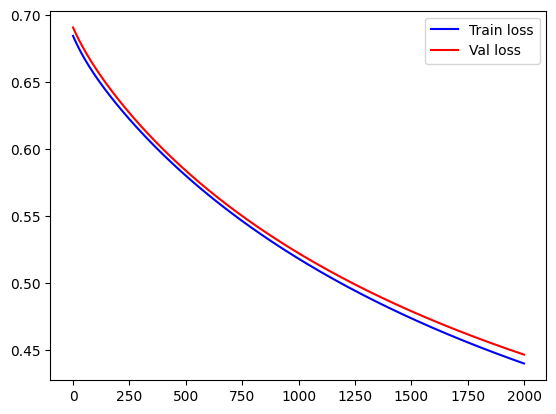

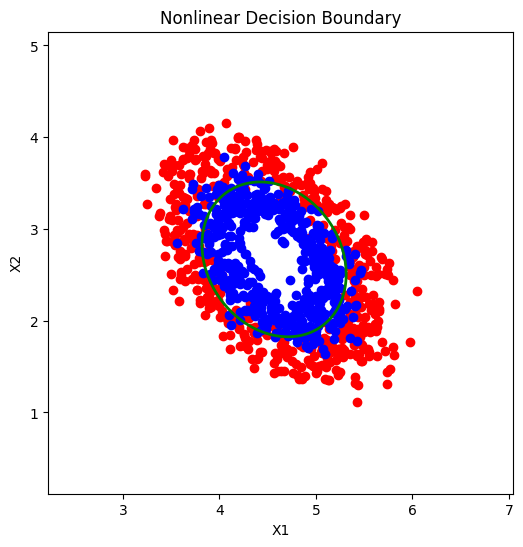

In [37]:
#Center & scale the donut data
x0, y0 = X_adv.mean(axis=0)
Xc     = X_adv - np.array([x0, y0])
Xs     = Xc / Xc.std(axis=0)
u, v   = Xs[:,0], Xs[:,1]

# Make quadratic features [u, v, u², u·v, v²]
X_conic = np.column_stack([u, v, u**2, u*v, v**2])

# Train logistic regression on these features
result_conic = lr_train_model(
    X_conic,
    y_adv,
    reshuffle   = 'yes',
    split_frac  = 0.8,
    init_weights= -1,
    no_iterations=2000,  
    alpha       = 0.01,  
    phi         = 0.05   
)
display_results(result_conic)

# plot like previously
plt.figure(figsize=(6,6))
data_scatter_plot(X_adv, y_adv)

# Unpack weights
b, w_u, w_v, w_uu, w_uv, w_vv = result_conic['weights'].ravel()

# Create grid in original space
xx, yy = np.meshgrid(
    np.linspace(X_adv[:,0].min()-1, X_adv[:,0].max()+1, 300),
    np.linspace(X_adv[:,1].min()-1, X_adv[:,1].max()+1, 300),
)
ug = (xx - x0)/Xc.std(axis=0)[0]
vg = (yy - y0)/Xc.std(axis=0)[1]
# Compute decision value Z and sigmoid P
Z = ( b+ w_u*ug+ w_v*vg+ w_uu*ug**2+ w_uv*(ug*vg)+ w_vv*vg**2)
P = 1/(1+np.exp(-Z))

# Draw boundary at P=0.5
plt.contour(xx, yy, P, levels=[0.5], colors='green', linewidths=2)
plt.title("Nonlinear Decision Boundary")
plt.xlabel("X1"); plt.ylabel("X2")
plt.show()


With these added features, the model can fit rotated ellipses instead of just straight lines. Moreover, the validation-loss curve closely tracks the training-loss curve, indicating that the model is capturing the data structure without overfitting.

## TASK 3

https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html
    

In [38]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split

Task 3a: A neural network learns non‐linear separable patterns through activation functions that are applied to the output of a neuron. Without this mathematical function, the neural network would behave like a linear regression model and will never correctly create a decision boundary for non-linearly seperable data. Each neuron computes a weighted sum of its inputs plus a bias, applies a non‐linear activation and passes the result forward. By stacking layers, the network warps the input space so that classes become linearly separable at deeper layers. During training, backpropagation adjusts all weights/biases to minimize classification error, gradually shaping complex decision boundaries that fit the data accurately.

In [39]:
# split off 20% for validation
X_train, X_val, y_train, y_val = train_test_split(X_adv, y_adv, test_size=0.20, random_state=42, shuffle=True)

mlp = MLPClassifier(
    hidden_layer_sizes=(30, 20),   # two hidden layers: 30 neurons, then 20 layers
    activation='relu', #non-linear ReLU activations 
    solver='adam',
    max_iter=2000,
    random_state=42,
)

#Train on the 80% split and evaluate accuracy
mlp.fit(X_train, y_train)
train_acc = mlp.score(X_train, y_train)
val_acc   = mlp.score(X_val,   y_val)
print(f"Train acc = {train_acc:.3f},  Val acc = {val_acc:.3f}")


Train acc = 0.896,  Val acc = 0.900


Similar to the previous tasks, we can check if the neural network is performing as it should by looking at the Decision boundary on the plot and check whether it follows the expected output i.e. creating a solid boundary.

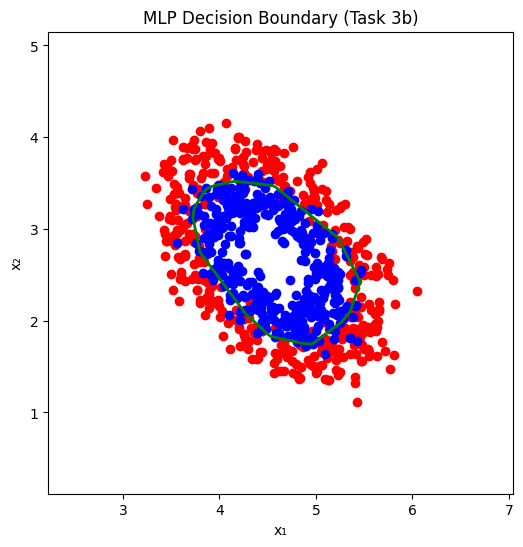

In [40]:
plt.figure(figsize=(6,6))
data_scatter_plot(X_train, y_train)  #Plot the data on a scatter plot

# build grid over the same feature space
xx, yy = np.meshgrid(
    np.linspace(X_adv[:,0].min()-1, X_adv[:,0].max()+1, 200),
    np.linspace(X_adv[:,1].min()-1, X_adv[:,1].max()+1, 200),
)
grid = np.c_[xx.ravel(), yy.ravel()]

# get class‐1 probability on each grid point
probs = mlp.predict_proba(grid)[:,1]

# contour at probability = 0.5
Z = probs.reshape(xx.shape)
plt.contour(xx, yy, Z, levels=[0.5], colors='green', linewidths=2)

plt.title("MLP Decision Boundary (Task 3b)")
plt.xlabel("x₁")
plt.ylabel("x₂")
plt.show()


Additional comments: I used AI in this project to help me familiarise myself with the new functions that were required from sklearn. Moreover, I used copilot to assist me in generating the  comments for my code. Example prompts are as follows: 
“Please review the following Python snippet and add clear, concise comments explaining each major step.”
“Explain how to use the predict_proba method of an MLPClassifier to generate a decision boundary contour plot.”
